<a href="https://colab.research.google.com/github/Gioo-byte/DataMining_KNN/blob/main/Tugas_DM_KNN_202201007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Used_Car_Purchase_Decision.csv') #memanggil datasetnya

In [3]:
dataset.head()

,Customer_ID,Gender,Age,AnnualIncome_K,PurchasedUsedCar
0,75021489,Male,19,22,0
1,83210947,Male,35,28,1
2,76128594,Female,26,47,0
3,76032416,Female,27,62,0
4,83040027,Male,19,81,0


In [4]:
x = dataset.iloc[:, [2,3]].values               #membagi nilai x untuk ambil yang berisi kolom ke2
y = dataset.iloc[:, -1].values                  #membagi nilai y

In [5]:
from sklearn.model_selection import train_test_split #bagi datanya menggunakan library sklearn
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler #mengubah skala data
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_tes = sc.transform(x_tes)

In [7]:
from sklearn.neighbors import KNeighborsClassifier #memanggil library KNN
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [8]:
y_prediksi = classifier.predict(x_tes)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score # Import accuracy_score
cm = confusion_matrix(y_tes, y_prediksi)
print(cm)

# Calculate the accuracy score
accuracy = accuracy_score(y_tes, y_prediksi)

print(f"Akurasi Model:{accuracy * 100:.2f}%")

[[34  0]
 [ 4 62]]
Akurasi Model:96.00%


<ipython-input-10-a0abe9cdfa5b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


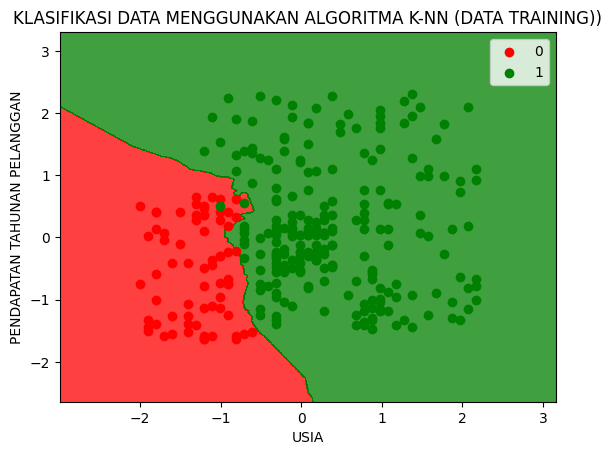

In [10]:
from matplotlib.colors import ListedColormap #membuat grafik
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TRAINING))')
plt.xlabel('USIA')
plt.ylabel('PENDAPATAN TAHUNAN PELANGGAN')
plt.legend()
plt.show()

<ipython-input-11-e4fef998454d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


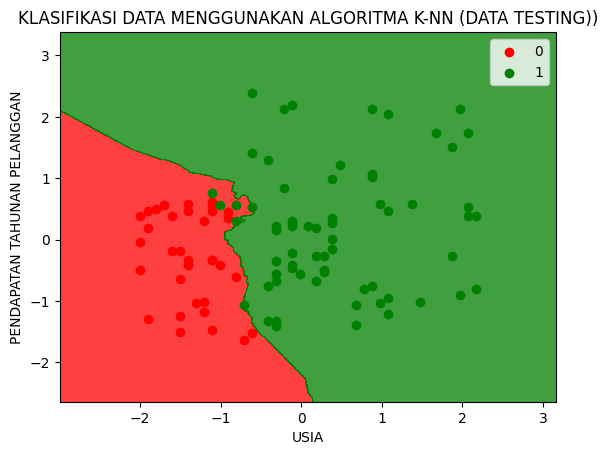

In [11]:
from matplotlib.colors import ListedColormap #membuat grafik
x_data, y_data = x_tes, y_tes
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('KLASIFIKASI DATA MENGGUNAKAN ALGORITMA K-NN (DATA TESTING))')
plt.xlabel('USIA')
plt.ylabel('PENDAPATAN TAHUNAN PELANGGAN')
plt.legend()
plt.show()